In [3]:
# Import packages for plotting, table manipulations
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

# Set style of each plot 
sns.set_style("white")

print(sns.__version__)

0.11.1


In [2]:
#Read csv which was created with groovy script from the tutorial
df = pd.read_csv('/fs/pool/pool-duderstadt/Karl/Projects/Mars/FMT_example/Gyrase_Scatter.csv')

# Take the absolute value of the NegativeBurstRate, so you can compare them in absolute values 
df['NegBurstRate'] = abs(df['NegBurstRate'])

# Filter out data depending on conditions stated in line below
# Take away first bin of the histogram (data was evaluted manually)
cleanup = df.loc[(df['NegBurstPosition'] > 0) & (df['PosBurstPosition'] > 0) & (df['PosBurstRate'] > 0.20)& (df['NegBurstRate'] > 0.20)]

# Inspect the dataframe
print(cleanup)


      PosBurstRate  PosBurstPosition  NegBurstRate  NegBurstPosition  \
0         1.812464          1277.988      0.519309          1626.549   
2         2.349173          1229.479      0.663196          1547.285   
5         1.864984          1271.237      0.828270          1460.770   
9         0.981264          1255.484      0.201261          1583.291   
10        1.917934          1233.730      0.790681          1430.264   
...            ...               ...           ...               ...   
2399      1.849325          1238.230      0.658883          1302.491   
2401      1.676014          1268.236      0.825700          1417.512   
2402      1.416046          1299.492      1.335290          1326.746   
2404      2.131353          1289.990      0.730777          1415.261   
2406      0.404612          1697.813      0.250286          1419.762   

             Force                     UID      Tag  
0     1.904726e-13  abaEJMuY7p9if4TFi9yja6  noBreak  
2     5.410418e-13  cFiWfUM

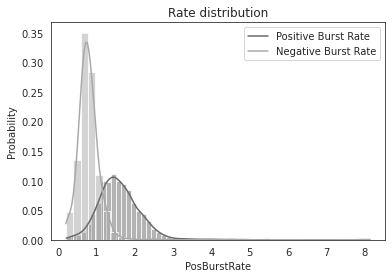

In [17]:

# Plot the histogram for PositiveBurstRate
sns.histplot(cleanup["PosBurstRate"], bins = round(math.sqrt(len(cleanup["PosBurstRate"]))), kde = True,  stat = 'probability', color = 'dimgrey').set_title('Rate distribution')
# Plot the histogram for NegativeBurstRate
sns.histplot(cleanup["NegBurstRate"], bins = round(math.sqrt(len(cleanup["NegBurstRate"]))), kde = True,  stat = 'probability', color = 'darkgray') 

# Label the plot 
plt.legend(labels=["Positive Burst Rate","Negative Burst Rate"])

# Display/save the plot 
#plt.show()
plt.savefig('210916_histplot.svg')

      PosBurstPosition  NegBurstPosition
0             1277.988          1626.549
2             1229.479          1547.285
5             1271.237          1460.770
9             1255.484          1583.291
10            1233.730          1430.264
...                ...               ...
2399          1238.230          1302.491
2401          1268.236          1417.512
2402          1299.492          1326.746
2404          1289.990          1415.261
2406          1697.813          1419.762

[1641 rows x 2 columns]


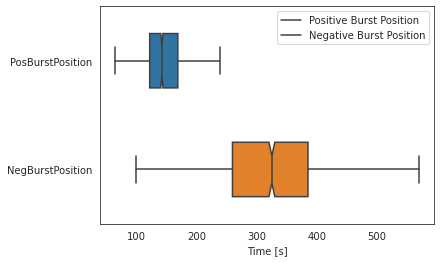

In [8]:
boxp = cleanup.filter(["PosBurstPosition","NegBurstPosition"])
print(boxp)

# time: gyrase reaction 4600-6990 
# frame 4600 = 1110.209 s

# Set postion back to Gyrase arrival in the flowcell
boxp['PosBurstPosition'] = boxp['PosBurstPosition']-1110.209
boxp['NegBurstPosition'] = boxp['NegBurstPosition']-1110.209

sns.boxplot(data=boxp,showfliers=False, notch=True,linewidth=1.5, width = 0.5,orient="h")
plt.legend(labels=["Positive Burst Position","Negative Burst Position"])
plt.xlabel('Time [s]')

plt.show()
#plt.savefig('210901_boxplot_position.svg')
# Save file as SVG so you can adjust colors easily later 

In [15]:
print('The average of the Positive Burst Rate is',cleanup['PosBurstRate'].mean())

print('The average of the Negative Burst Rate is', cleanup['NegBurstRate'].mean())

The average of the Positive Burst Rate is 1.59076852841762
The average of the Negative Burst Rate is 0.8038159851690998
